# Introduction

In this project, machine learning will be applied to predict whether a person has been diagnosed with a heart attack. Data from the Behavioral Risk Factor Surveillance System (BRFSS) will be used <cite data-cite="cdc">(Centers for Disease Control and Prevention, 2018)</cite>. The BRFSS is a health-related telephone survey that is annually held among U.S. residents.

The project will consist of two parts. The main purpose of this report is to preprocess the data and to explore distributions and relationships among the features. In the next phase, the machine learning modelling will be presented. 

## Data

The BRFSS consists of multiple sections, collecting information on the demographic background, the food habits, the physical activity and the health status of a person. The survey is held throughout the year. For this project, survey data recorded in February 2017 will be used, which consists of 31620 instances and 358 features. One of these features will be our target feature. For the descriptive features, a selection needs to be made to make sure that all variables are relevant for the target feature. 

### Target feature

In the survey, people are asked the following question: "Has a doctor, nurse, or other health professional ever told you that you had a heart attack, also called a myocardial infarction?" Possible answers included yes, no, not sure or refused to answer. The interest of this project lies in the prediction of a heart attack diagnosis. To accommodate this objective, the instances with answers "yes" and "no" will be considered only. The machine learning model in the next phase will therefore focus on binary classification of the target feature.

### Descriptive features

Due to the large amount of questions asked in the BRFSS, the following approach is used to shrink the number of feature variables:

- Start off with variables calculcated by the CDC based on survey questions (variables are categorized, imputed or combined);
- Variables with more than 15% missing values will be neglected;
- Variables with overlapping information will be dropped;
- Variables with irrelevant information towards the target feature will be dropped.

As a result, the following 19 features are kept, listed with the possible response values:

* **`state`**: 1 Alabama, 2 Alaska, 4 Arizona, 5 Arkansas, 6 California, 8 Colorado, 9 Connecticut, 10 Delaware, 11 District of Columbia, 12 Florida, 13 Georgia, 15 Hawaii, 16 Idaho, 17 Illinois, 18 Indiana, 19 Iowa, 20 Kansas, 21 Kentucky, 22 Louisiana, 23 Maine, 24 Maryland, 25 Massachusetts, 26 Michigan, 27 Minnesota, 28 Mississippi, 29 Missouri, 30 Montana, 31 Nebraska, 32 Nevada, 33 New Hampshire, 34 New Jersey, 35 New Mexico, 36 New York, 37 North Carolina, 38 North Dakota, 39 Ohio, 40 Oklahoma, 41 Oregon, 42 Pennsylvania, 44 Rhode Island, 45 South Carolina, 46 South Dakota, 47 Tennessee, 48 Texas, 49 Utah, 50 Vermont, 51 Virginia, 53 Washington, 54 West Virginia, 55 Wisconsin, 56 Wyoming, 66 Guam, 72 Puerto Rico.
* **`gender`**: 1 male, 2 female.
* **`health_status`**: 1 excellent, 2 very good, 3 good, 4 fair, 5 poor.
* **`high_blood_pressure`**: 1 no, 2 yes.
* **`high_cholesterol`**: 1 no, 2 yes.
* **`asthma`**: 1 no, 2 yes.
* **`arthritis`**: 1 yes, 2 no.
* **`age`**: 
    1: age 18 to 24,
    2: age 25 to 34,
    3: age 35 to 44,
    4: age 45 to 54,
    5: age 55 to 64,
    6: age 65 or older.
* **`height`**: continuous.
* **`weight`**: continuous.
* **`overweight`**: 1 no, 2 yes.
* **`smoking`**: 1 no, 2 yes.
* **`alcohol`**: 1 no, 2 yes.
* **`fruit`**: 1 yes, 2 no.
* **`vegetables`**: 1 yes, 2 no.
* **`oxygen_max`**: continuous.
* **`functional_capacity`**: continuous.
* **`aerobic_guideline`**: 1 yes, 2 no.
* **`strength_guideline`**: 1 yes, 2 no.

The response values are collected by asking the survey questions over the telephone. Answers are therefore given from the participant's perspective without any measurements, evidence or observation by the CDC.

The features can be divided into a few categories. For the health related features, health of the participant is ranked on a scale from 1 to 5 and the participant was asked if certain diagnoses were ever communicated, namely high blood pressure, high cholesterol, asthma or arthritis. There are a couple of features that describe the participant's biometrics: height in meters, weight in kilograms and overweight when BMI is higher than 25. Next there are four features that describe the health habits: is the participant a current smoker, does the participant drink more than four (for women) or five (for men) alcholic beverages on one occasion, and does the participant eat fruit and vegetables more than once a day. As a final category, the physical status is recorded with the Estimated Age-Gender Specific Maximum Oxygen Consumption, the Estimated Functional Capacity and with the aerobic and muscle strengtening guidelines.

# Data Preprocessing

As stated above, the full data set contains a large amount of features. Not wanting to take up space with our manual selection of variables, we do this process and save this smaller data frame to a csv which we will use in this project.

In [1]:
import pandas as pd
cdc_data_calc = pd.read_csv('cdc_calc_vars_only.csv', low_memory = False)

In [2]:
cdc_data_calc.head()

,STATE FIPS CODE,RESPONDENTS SEX,GENERAL HEALTH,EVER DIAGNOSED WITH HEART ATTACK,ADULTS WITH GOOD OR BETTER HEALTH,COMPUTED PHYSICAL HEALTH STATUS,COMPUTED MENTAL HEALTH STATUS,RESPONDENTS AGED 18-64 WITH HEALTH CARE,HIGH BLOOD PRESSURE CALCULATED VARIABLE,CHOLESTEROL CHECKED CALCULATED VARIABLE,...,300 MINUTE PHYSICAL ACTIVITY CALCULATED,300 MINUTE PHYSICAL ACTIVITY 2-LEVEL CAL,MUSCLE STRENGTHENING RECOMMENDATION,AEROBIC AND STRENGTHENING GUIDELINE,AEROBIC AND STRENGTHENING (2-LEVEL),ALWAYS OR NEARLY ALWAYS WEAR SEAT BELTS,ALWAYS WEAR SEAT BELTS,FLU SHOT CALCULATED VARIABLE,PNEUMONIA VACCINATION CALCULATED VARIABL,EVER BEEN TESTED FOR HIV CALCULATED VARI
0,1,2,2.0,2.0,1,1,1,9,2,1,...,3,2,2,4,2,1,1,2.0,2.0,2.0
1,1,2,4.0,2.0,2,9,3,9,2,1,...,3,2,2,4,2,1,1,1.0,1.0,2.0
2,1,1,5.0,7.0,2,3,1,1,2,1,...,3,2,2,4,2,2,2,NaN,NaN,2.0
3,1,2,5.0,2.0,2,2,1,9,1,1,...,1,1,2,2,2,1,1,1.0,1.0,1.0
4,1,2,2.0,2.0,1,1,1,9,2,1,...,3,2,2,4,2,1,1,1.0,1.0,2.0


## Remove variables with large number of missing values

First we will deal with columns with a large amount of missing values. We take a look at the percent of values missing for each column below.

In [3]:
percent_missing = cdc_data_calc.isnull().sum() * 100 / len(cdc_data_calc)
missing_values = pd.DataFrame({'percent_missing' : percent_missing})
missing_values.sort_values('percent_missing', inplace=True)
features_missing_values = missing_values[missing_values.percent_missing > 0]
features_missing_values

,percent_missing
GENERAL HEALTH,0.003163
LIMITED WORK ACTIVITIES,0.670462
RESPONDENTS DIAGNOSED WITH ARTHRITIS,0.670462
LIMITED USUAL ACTIVITIES,0.670462
LIMITED SOCIAL ACTIVITIES,0.670462
RESPONDENTS THAT HAVE EVER REPORTED HAVI,0.872865
COMPUTED RACE GROUPS USED FOR INTERNET P,1.979760
COMPUTED HEIGHT IN METERS,3.586338
COMPUTED HEIGHT IN INCHES,3.864643
COMPUTED WEIGHT IN KILOGRAMS,6.682479


We notice there is a large jump in missing values after the high cholesterol calculated variable. We make the decision to cut all of the columns with more missing values than this.

In [4]:
cdc_data_calc_miss = cdc_data_calc.loc[:, percent_missing < 15.0]
print(f"{len(cdc_data_calc.columns)-len(cdc_data_calc_miss.columns)} columns will be removed")
print(f"New dimension: {cdc_data_calc_miss.shape}\n")

18 columns will be removed
New dimension: (31620, 82)



## Selecting Variables and Cleaning

In this section we look at the remaining variables. We remove columns with repetative information or information that will not be related to our target variable (i.e Race). In the columns we retain, we will remove instances with missing values. Besides missing values, some variables also have answers that reflect missing data (i.e "refused to answer"). We will also drop these instances. Further, we rename the columns to more compact variable names. We start by looking at our target feature.

In [5]:
df = cdc_data_calc_miss.copy()

## Target feature

Ever diagnosed with heart attack: 
- (1) yes
- (2) no
- (7) don't know / not sure
- (9) refused to answer

Calculated variable: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI): yes (1) or no (2)


In [6]:
col_target = 'EVER DIAGNOSED WITH HEART ATTACK'
print(df[col_target].value_counts())
print(df[col_target].value_counts().sum())

2.0    29676
1.0     1780
7.0      155
9.0        9
Name: EVER DIAGNOSED WITH HEART ATTACK, dtype: int64
31620


In [7]:
df_target = df.copy();
df_target.rename(columns = {'EVER DIAGNOSED WITH HEART ATTACK':'heart_attack'}, inplace=True)

# Only interested in yes or no,
# remove instances with values not 1 and 2
df_target = df_target[df_target.heart_attack.isin([1,2])]

# Change scale
df_target.loc[df_target['heart_attack'] == 2, 'heart_attack'] = 0

# Drop overlapping feature
df_target = df_target.drop(columns = 'RESPONDENTS THAT HAVE EVER REPORTED HAVI');

print(df_target['heart_attack'].value_counts())
print(f"\n{len(df) - len(df_target)} rows are removed")
print(df_target.shape)

0.0    29676
1.0     1780
Name: heart_attack, dtype: int64

164 rows are removed
(31456, 81)


## Remove variables with overlapping information

### Health status

Would you say that in general your health is:
- 1 excellent
- 2 very good
- 3 good
- 4 fair
- 5 poor


In [8]:
df_health_status = df_target.copy();

# General health status
df_health_status.rename(columns = {'GENERAL HEALTH':'health_status'}, inplace=True)
print(df_health_status['health_status'].value_counts())
# -- remove unknown values
df_health_status = df_health_status[df_health_status.health_status.isin([1, 2, 3, 4, 5])]

features_health_status_drop = ['ADULTS WITH GOOD OR BETTER HEALTH',
 'COMPUTED PHYSICAL HEALTH STATUS',
 'COMPUTED MENTAL HEALTH STATUS',
 'RESPONDENTS AGED 18-64 WITH HEALTH CARE']
#for feature in features_health_status:
#    print(df_health_status[feature].value_counts())

# Drop features due to ambiguity and number of missing relevant answer
for feature in features_health_status_drop:
    df_health_status = df_health_status.drop(columns = feature);

print(df_health_status.shape)    


2.0    10333
3.0     9826
1.0     5348
4.0     4229
5.0     1638
7.0       57
9.0       24
Name: health_status, dtype: int64
(31374, 77)


### Heart condition related

Feature category: heart related health information.

- Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional: no (1) or yes (2)
- Adults who have had their cholesterol checked and have been told by a doctor, nurse, or other health professional that it was high: no (1) or yes (2)


In [9]:
df_heart_condition = df_health_status.copy();

# High blood pressure
df_heart_condition.rename(columns = {'HIGH BLOOD PRESSURE CALCULATED VARIABLE':'high_blood_pressure'}, inplace=True)
df_heart_condition.loc[df_heart_condition['high_blood_pressure'] == 1, 'high_blood_pressure'] = 0
df_heart_condition.loc[df_heart_condition['high_blood_pressure'] == 2, 'high_blood_pressure'] = 1
# -- due to importance of feature, remove all instances with unknown value
df_heart_condition = df_heart_condition[df_heart_condition.high_blood_pressure.isin([0,1])]
print(df_heart_condition['high_blood_pressure'].value_counts())

# High cholesterol
df_heart_condition.rename(columns = {'HIGH CHOLESTEROL CALCULATED VARIABLE':'high_cholesterol'}, inplace=True)
df_heart_condition.loc[df_heart_condition['high_cholesterol'] == 1, 'high_cholesterol'] = 0
df_heart_condition.loc[df_heart_condition['high_cholesterol'] == 2, 'high_cholesterol'] = 1
print(df_heart_condition['high_cholesterol'].value_counts())

# Remove overlapping variable and due to ambiguity.
df_heart_condition = df_heart_condition.drop(columns = 'CHOLESTEROL CHECKED CALCULATED VARIABLE')

print(df_heart_condition.shape)  


0    18906
1    12394
Name: high_blood_pressure, dtype: int64
0.0    16862
1.0    10780
Name: high_cholesterol, dtype: int64
(31300, 76)


### Asthma and Arthritis

- Lifetime asthma status, ever been told they have asthma: no (1) or yes (2)

- Respondents who have had a doctor diagnose them as having some form of arthritis: yes (1) or no (2)


In [10]:
df_ast_arth = df_heart_condition.copy();

# Asthma
df_ast_arth.rename(columns = {'LIFETIME ASTHMA CALCULATED VARIABLE':'asthma'}, inplace=True)
df_ast_arth.loc[df_ast_arth['asthma'] == 1, 'asthma'] = 0
df_ast_arth.loc[df_ast_arth['asthma'] == 2, 'asthma'] = 1
print(df_ast_arth['asthma'].value_counts())
# -- drop unknown values
df_ast_arth = df_ast_arth[df_ast_arth.asthma.isin([0,1])]

# Arthritis
df_ast_arth.rename(columns = {'RESPONDENTS DIAGNOSED WITH ARTHRITIS':'arthritis'}, inplace=True)
df_ast_arth.loc[df_ast_arth['arthritis'] == 2, 'arthritis'] = 0
print(df_ast_arth['arthritis'].value_counts())
                              
# Dropping overlapping and ambiguous asthma features
features_asthma_drop = ['CURRENT ASTHMA CALCULATED VARIABLE',
                        'COMPUTED ASTHMA STATUS']
for feature in features_asthma_drop:
    df_ast_arth = df_ast_arth.drop(columns = feature);

# Dropping overlapping and ambiguous arthritis features
features_arthritis_drop = ['LIMITED USUAL ACTIVITIES',
                           'LIMITED WORK ACTIVITIES',
                           'LIMITED SOCIAL ACTIVITIES']
for feature in features_arthritis_drop:
    df_ast_arth = df_ast_arth.drop(columns = feature);
    
print(df_ast_arth.shape)


0    26899
1     4312
9       89
Name: asthma, dtype: int64
0.0    20985
1.0    10038
Name: arthritis, dtype: int64
(31211, 71)


### Race (Demographics)

In [11]:
df_race = df_ast_arth.copy()

features_race = ['COMPUTED PREFERRED RACE',
                 'CALCULATED NON-HISPANIC RACE INCLUDING M',
                 'HISPANIC, LATINO/A, OR SPANISH ORIGIN CA',
                 'COMPUTED RACE-ETHNICITY GROUPING',
                 'COMPUTED NON-HISPANIC WHITES/ALL OTHERS',
                 'COMPUTED FIVE LEVEL RACE/ETHNICITY CATEG',
                'COMPUTED RACE GROUPS USED FOR INTERNET P']

# Drop all race features.
for feature in features_race:
    #print(df[feature].value_counts())
    df_race = df_race.drop(columns = feature);

print(df_race.shape)

(31211, 64)


### Age (Demographics)

Imputed age in six groups: 
- 1: age 18 to 24
- 2: age 25 to 34
- 3: age 35 to 44
- 4: age 45 to 54
- 5: age 55 to 64
- 6: age 65 or older

In [12]:
df_age = df_race.copy();

# Age
df_age.rename(columns={'IMPUTED AGE IN SIX GROUPS': 'age'}, inplace=True)
print(df_age['age'].value_counts())
# TODO: Find out how to scale between [0,1] with pandas

# Drop overlapping variables
features_age_drop = ['REPORTED AGE IN FIVE-YEAR AGE CATEGORIES',
                     'REPORTED AGE IN TWO AGE GROUPS CALCULATE',
                     'IMPUTED AGE VALUE COLLAPSED ABOVE 80']

for feature in features_age_drop:
    df_age = df_age.drop(columns = feature);

print(df_age.shape)

6    10673
5     6893
4     5008
3     3569
2     3291
1     1777
Name: age, dtype: int64
(31211, 61)


In [13]:
df_age.head()

,STATE FIPS CODE,RESPONDENTS SEX,health_status,heart_attack,high_blood_pressure,high_cholesterol,asthma,arthritis,age,COMPUTED HEIGHT IN INCHES,...,PHYSICAL ACTIVITY INDEX,150 MINUTE PHYSICAL ACTIVITY CALCULATED,300 MINUTE PHYSICAL ACTIVITY CALCULATED,300 MINUTE PHYSICAL ACTIVITY 2-LEVEL CAL,MUSCLE STRENGTHENING RECOMMENDATION,AEROBIC AND STRENGTHENING GUIDELINE,AEROBIC AND STRENGTHENING (2-LEVEL),ALWAYS OR NEARLY ALWAYS WEAR SEAT BELTS,ALWAYS WEAR SEAT BELTS,EVER BEEN TESTED FOR HIV CALCULATED VARI
0,1,2,2.0,0.0,1,1.0,0,0.0,6,66.0,...,2,3,3,2,2,4,2,1,1,2.0
1,1,2,4.0,0.0,1,1.0,0,1.0,6,63.0,...,2,3,3,2,2,4,2,1,1,2.0
3,1,2,5.0,0.0,0,0.0,0,0.0,6,63.0,...,1,1,1,1,2,2,2,1,1,1.0
4,1,2,2.0,0.0,1,1.0,0,1.0,6,64.0,...,2,3,3,2,2,4,2,1,1,2.0
5,1,1,1.0,0.0,0,NaN,0,1.0,5,66.0,...,2,2,2,2,1,3,2,1,1,1.0


### Gender (demographics)

Male (1) or female (2)

In [14]:
df_gender = df_age.copy();

# Gender
df_gender.rename(columns={'RESPONDENTS SEX': 'gender'}, inplace=True)
print(df_gender['gender'].value_counts())
# -- drop unknown values
df_gender = df_gender[df_gender.gender.isin([1,2])]

print(df_gender.shape)

2    17450
1    13749
9       12
Name: gender, dtype: int64
(31199, 61)


### State (demographics)

1 	Alabama 
2 	Alaska 
4 	Arizona 
5 	Arkansas 
6 	California 
8 	Colorado 
9 	Connecticut 
10 	Delaware 
11 	District of Columbia 
12 	Florida 
13 	Georgia 
15 	Hawaii 
16 	Idaho 
17 	Illinois 
18 	Indiana 
19 	Iowa 
20 	Kansas 
21 	Kentucky 
22 	Louisiana 
23 	Maine 
24 	Maryland 
25 	Massachusetts 
26 	Michigan 
27 	Minnesota 
28 	Mississippi 
29 	Missouri 
30 	Montana 
31 	Nebraska 
32 	Nevada 
33 	New Hampshire 
34 	New Jersey 
35 	New Mexico 
36 	New York 
37 	North Carolina 
38 	North Dakota 
39 	Ohio 
40 	Oklahoma 
41 	Oregon 
42 	Pennsylvania 
44 	Rhode Island 
45 	South Carolina 
46 	South Dakota 
47 	Tennessee 
48 	Texas 
49 	Utah 
50 	Vermont 
51 	Virginia 
53 	Washington 
54 	West Virginia 
55 	Wisconsin 
56 	Wyoming 
66 	Guam 
72 	Puerto Rico 

In [15]:
df_state = df_gender.copy();

# State
df_state.rename(columns={'STATE FIPS CODE': 'state'}, inplace=True)
#print(df_state['state'].value_counts())
print(f"Missing values in state: {len(df_gender)-df_state['state'].value_counts().sum()}")
      
print(df_state.shape)

Missing values in state: 0
(31199, 61)


### Body measurements

- Height in meters
- Weight in kilograms
- Overweight or obese: no (1) or yes (2)

In [16]:
df_body = df_state.copy();

# Height
df_body.rename(columns={'COMPUTED HEIGHT IN METERS': 'height'}, inplace=True)
#print(df_body['height'].value_counts())
print(f"Missing values in height: {len(df_age)-df_body['height'].value_counts().sum()}")
# -- about 1100 instances with unknown value
# -- TODO: either remove instances or remove variable altogether
df_body = df_body[df_body.height.notnull()]

# Weight
df_body.rename(columns={'COMPUTED WEIGHT IN KILOGRAMS': 'weight'}, inplace=True)
df_body['weight'] = df_body['weight'].div(100)
#print(df_body['weight'].value_counts())
print(f"Missing values in weight: {len(df_age)-df_body['weight'].value_counts().sum()}\n")
# -- about 2000 instances with unknown value
# -- TODO: either remove instances or remove variable altogether
df_body = df_body[df_body.weight.notnull()]

# Obesity
df_body.rename(columns={'OVERWEIGHT OR OBESE CALCULATED VARIABLE': 'overweight'}, inplace=True)
df_body.loc[df_body['overweight'] == 1, 'overweight'] = 0
df_body.loc[df_body['overweight'] == 2, 'overweight'] = 1
print(df_body['overweight'].value_counts())
# -- about 2500 instances with unknown value
# -- TODO: either remove instances or remove variable altogether
df_body = df_body[df_body.overweight.isin([0,1])]

# Remove overlapping variables
features_measurements_drop = ['COMPUTED HEIGHT IN INCHES',
 'COMPUTED BODY MASS INDEX',
 'COMPUTED BODY MASS INDEX CATEGORIES']

for feature in features_measurements_drop:
    df_body = df_body.drop(columns = feature);
    
print(df_body.shape)

Missing values in height: 1111
Missing values in weight: 2311

1    19303
0     9420
9      177
Name: overweight, dtype: int64
(28723, 58)


### Other background info 

In [17]:
df_background = df_body.copy();

# Remove all variables due to irrelevance or missing values
features_demographics = ['COMPUTED NUMBER OF CHILDREN IN HOUSEHOLD',
 'COMPUTED LEVEL OF EDUCATION COMPLETED CA',
 'COMPUTED INCOME CATEGORIES']

for feature in features_demographics:
    #print(df_background[feature].value_counts())
    df_background = df_background.drop(columns = feature);
    
print(df_background.shape)

(28723, 55)


### Smoking

- Currently smoking: no (1) or yes (2)

In [18]:
df_smoking = df_background.copy();

# Smoking
df_smoking.rename(columns={'CURRENT SMOKING CALCULATED VARIABLE': 'smoking'}, inplace=True)
df_smoking.loc[df_smoking['smoking'] == 1, 'smoking'] = 0
df_smoking.loc[df_smoking['smoking'] == 2, 'smoking'] = 1
print(df_smoking['smoking'].value_counts())
#  -- drop unknown values
df_smoking = df_smoking[df_smoking.smoking.isin([0,1])]

# Drop variables for overlap or ambiguity
features_smoking_drop = ['COMPUTED SMOKING STATUS',
 'COMPUTED E-CIGARETTE USER STATUS',
 'CURRENT E-CIGARETTE USER CALCULATED VARI']

for feature in features_smoking_drop:
    df_smoking = df_smoking.drop(columns = feature);

print(df_smoking.shape)

0    23842
1     4222
9      659
Name: smoking, dtype: int64
(28064, 52)


### Alcohol

- Binge drinkers (males having five or more drinks on one occasion, females having four or more drinks on one
occasion): no (1) or yes (2)

In [19]:
df_alcohol = df_smoking.copy();

# Alcohol consumption
df_alcohol.rename(columns={'BINGE DRINKING CALCULATED VARIABLE': 'alcohol'}, inplace=True)
df_alcohol.loc[df_alcohol['alcohol'] == 1, 'alcohol'] = 0
df_alcohol.loc[df_alcohol['alcohol'] == 2, 'alcohol'] = 1
print(df_alcohol['alcohol'].value_counts())
#  -- drop unknown values
df_alcohol = df_alcohol[df_alcohol.alcohol.isin([0,1])]

# Drop overlapping variables
features_alcohol_drop = ['DRINK ANY ALCOHOLIC BEVERAGES IN PAST 30',
                         'COMPUTED DRINK-OCCASIONS-PER-DAY',
                         'COMPUTED NUMBER OF DRINKS OF ALCOHOL BEV',
                         'HEAVY ALCOHOL CONSUMPTION  CALCULATED VA']
for feature in features_alcohol_drop:
    df_alcohol = df_alcohol.drop(columns = feature);

print(df_alcohol.shape)

0    23808
1     3489
9      767
Name: alcohol, dtype: int64
(27297, 48)


### Fruit and vegetables 

- Consume Fruit 1 or more times per day: yes (1) or no (2)
- Consume Vegetables 1 or more times per day: yes (1) or no (2)

In [20]:
df_fruitveg = df_alcohol.copy();

# Fruit
df_fruitveg.rename(columns={'CONSUME FRUIT 1 OR MORE TIMES PER DAY': 'fruit'}, inplace=True)
df_fruitveg.loc[df_fruitveg['fruit'] == 2, 'fruit'] = 0 
print(df_fruitveg['fruit'].value_counts())
#  -- drop unknown values
df_fruitveg = df_fruitveg[df_fruitveg.fruit.isin([0,1])]

# Vegetables
df_fruitveg.rename(columns={'CONSUME VEGETABLES 1 OR MORE TIMES PER D': 'vegetables'}, inplace=True)
df_fruitveg.loc[df_fruitveg['vegetables'] == 2, 'vegetables'] = 0 
print(df_fruitveg['vegetables'].value_counts())
#  -- drop unknown values
df_fruitveg = df_fruitveg[df_fruitveg.vegetables.isin([0,1])]

# Drop variables due to irrelevance or overlap
features_fruitveg_drop = ['COMPUTED FRUIT JUICE INTAKE IN TIMES PER',
 'COMPUTED FRUIT INTAKE IN TIMES PER DAY',
 'COMPUTED DARK GREEN VEGETABLE INTAKE IN',
 'FRENCH FRY INTAKE IN TIMES PER DAY',
 'COMPUTED POTATO SERVINGS PER DAY',
 'COMPUTED OTHER VEGETABLE INTAKE IN TIMES',
 'THE NUMBER OF MISSING FRUIT RESPONSES',
 'THE NUMBER OF MISSING VEGETABLE RESPONSE',
 'MISSING ANY FRUIT RESPONSES',
 'MISSING ANY VEGETABLE RESPONSES',
 'TOTAL FRUITS CONSUMED PER DAY',
 'TOTAL VEGETABLES CONSUMED PER DAY',
 'REPORTED CONSUMING FRUIT >16/DAY',
 'REPORTED CONSUMING VEGETABLES >23/DAY',
 'FRUIT EXCLUSION FROM ANALYSES',
 'VEGETABLE EXCLUSION FROM ANALYSES']

for feature in features_fruitveg_drop:
    df_fruitveg = df_fruitveg.drop(columns = feature);
    
print(df_fruitveg.shape)

1    17462
0     8915
9      920
Name: fruit, dtype: int64
1    21284
0     4261
9      832
Name: vegetables, dtype: int64
(25545, 32)


### Physical activity

- Estimated Age-Gender Specific Maximum Oxygen Consumption: two implied decimal places
- Estimated Functional Capacity: two implied decimal places
- Physical Activity Index: meet aerobic recommendations (1), did not meet aeorobic rec (2)
- Muscle Strengthening Recommendation: yes (1), no (2)

In [21]:
df_physical = df_fruitveg.copy();

# Maximum Oxygen Consumption
df_physical.rename(columns={'ESTIMATED AGE-GENDER SPECIFIC MAXIMUM OX': 'oxygen_max'}, inplace=True)
df_physical['oxygen_max'] = df_physical['oxygen_max'].div(100)
#print(df_physical['oxygen_max'].value_counts())
# Drop value 999 (unknown value)
df_physical = df_physical.loc[df_physical['oxygen_max'] != 999]
print(f"Missing values in oxygen_max: {len(df_fruitveg)-df_physical['oxygen_max'].value_counts().sum()}")

# Functional capacity
df_physical.rename(columns={'ESTIMATED FUNCTIONAL CAPACITY': 'functional_capacity'}, inplace=True)
df_physical['functional_capacity'] = df_physical['functional_capacity'].div(100)
#print(df_physical['functional_capacity'].value_counts())
# Drop value 999 (unknown value)
df_physical = df_physical.loc[df_physical['functional_capacity'] != 999]
print(f"Missing values in functional_capacity: {len(df_fruitveg)-df_physical['functional_capacity'].value_counts().sum()}\n")

# Aerobic guideline
df_physical.rename(columns={'PHYSICAL ACTIVITY INDEX': 'aerobic_guideline'}, inplace=True)
df_physical.loc[df_physical['aerobic_guideline'] == 2, 'aerobic_guideline'] = 0 
print(df_physical['aerobic_guideline'].value_counts())
#  -- drop unknown values
df_physical = df_physical[df_physical.aerobic_guideline.isin([0,1])]

# Strength guideline
df_physical.rename(columns={'MUSCLE STRENGTHENING RECOMMENDATION': 'strength_guideline'}, inplace=True)
df_physical.loc[df_physical['strength_guideline'] == 2, 'strength_guideline'] = 0 
print(df_physical['strength_guideline'].value_counts())
#  -- drop unknown values
df_physical = df_physical[df_physical.strength_guideline.isin([0,1])]

# Drop variables
features_physical_drop = ['LEISURE TIME PHYSICAL ACTIVITY CALCULATE',
 'STRENGTH ACTIVITY FREQUENCY PER WEEK',
 'MISSING PHYSICAL ACTIVITY DATA',
 'PHYSICAL ACTIVITY CATEGORIES',
 '150 MINUTE PHYSICAL ACTIVITY CALCULATED',
 '300 MINUTE PHYSICAL ACTIVITY CALCULATED',
 '300 MINUTE PHYSICAL ACTIVITY 2-LEVEL CAL',
 'AEROBIC AND STRENGTHENING GUIDELINE',
 'AEROBIC AND STRENGTHENING (2-LEVEL)']

for feature in features_physical_drop:
    df_physical = df_physical.drop(columns = feature);
    
print(df_physical.shape)

Missing values in oxygen_max: 155
Missing values in functional_capacity: 155

0    12697
1    11951
9      742
Name: aerobic_guideline, dtype: int64
0    17177
1     7221
9      250
Name: strength_guideline, dtype: int64
(24398, 23)


### Seat belt

In [22]:
df_seatbelt = df_physical.copy();

# Drop variables due to irrelevance and missing values
features_seatbelt = ['ALWAYS OR NEARLY ALWAYS WEAR SEAT BELTS',
                     'ALWAYS WEAR SEAT BELTS']
for feature in features_seatbelt:
    df_seatbelt = df_seatbelt.drop(columns = feature);
    
print(df_seatbelt.shape)

(24398, 21)


### Hiv

In [23]:
df_hiv = df_seatbelt.copy();

# Drop variables due to ambiguity
df_hiv = df_hiv.drop(columns = 'EVER BEEN TESTED FOR HIV CALCULATED VARI')

print(df_hiv.shape)

df_select = df_hiv.copy();

(24398, 20)


## Check selected features

In [24]:
list(df_select.columns.values)

df_select.describe()

,state,gender,health_status,heart_attack,high_blood_pressure,high_cholesterol,asthma,arthritis,age,height,weight,overweight,smoking,alcohol,fruit,vegetables,oxygen_max,functional_capacity,aerobic_guideline,strength_guideline
count,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000,21832.000000,24398.000000,24275.000000,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000,24398.000000
mean,30.195057,1.546356,2.543774,0.055906,0.396836,0.398269,0.138741,0.328198,4.423108,170.078326,81.783386,0.676941,0.146815,0.128863,0.661325,0.833429,28.548739,4.894124,0.483687,0.295967
std,16.143834,0.497857,1.071122,0.229745,0.489251,0.489553,0.345683,0.469567,1.557985,10.589625,20.392992,0.467655,0.353929,0.335055,0.473269,0.372600,8.233391,1.411504,0.499744,0.456486
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,105.000000,28.120000,0.000000,0.000000,0.000000,0.000000,0.000000,5.550000,0.950000,0.000000,0.000000
25%,19.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,163.000000,68.040000,0.000000,0.000000,0.000000,0.000000,1.000000,22.600000,3.870000,0.000000,0.000000
50%,30.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,170.000000,79.380000,1.000000,0.000000,0.000000,1.000000,1.000000,27.280000,4.680000,0.000000,0.000000
75%,42.000000,2.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.000000,178.000000,92.990000,1.000000,0.000000,0.000000,1.000000,1.000000,33.940000,5.820000,1.000000,1.000000
max,72.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,226.000000,272.160000,1.000000,1.000000,1.000000,1.000000,1.000000,50.100000,8.590000,1.000000,1.000000


# Data Visualization

To make the some of the visualisations more meaningful I will create a copy of the dataframe and replace the numerical placeholders with their categorical counterpart.

In [25]:
import numpy as np

In [26]:
df = df_select.copy()

In [27]:
for col in df.max()[lambda x : x == 1].index.tolist():
    df.loc[df[col]==0, col] = 'No'
    df.loc[df[col]==1, col] = 'Yes'

state = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
             'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
             'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
             'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
             'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
             'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
             'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
             'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Guam',
             'Puerto Rico']
k=0
state_num_sorted = np.sort(df.state.unique())
for j in state_num_sorted:
    df.loc[df['state'] == j, 'state'] = state[k]
    k = k + 1
    
df.loc[df['gender']==1, 'gender'] = 'Male'
df.loc[df['gender']==2, 'gender'] = 'Female'

age = ['18 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 or older']
age_num_sorted = np.sort(df.age.unique())
k=0;
for j in age_num_sorted:
    df.loc[df['age']==j, 'age'] = age[k]
    k = k +1

df.head()

,state,gender,health_status,heart_attack,high_blood_pressure,high_cholesterol,asthma,arthritis,age,height,weight,overweight,smoking,alcohol,fruit,vegetables,oxygen_max,functional_capacity,aerobic_guideline,strength_guideline
0,Alabama,Female,2.0,No,Yes,Yes,No,No,65 or older,168.0,89.36,Yes,No,No,No,Yes,23.58,4.04,No,No
3,Alabama,Female,5.0,No,No,No,No,No,65 or older,160.0,46.27,No,No,No,Yes,Yes,16.55,2.84,Yes,No
4,Alabama,Female,2.0,No,Yes,Yes,No,Yes,65 or older,163.0,78.02,Yes,No,No,No,No,22.84,3.92,No,No
5,Alabama,Male,1.0,No,No,NaN,No,Yes,55 to 64,168.0,74.84,Yes,Yes,No,Yes,Yes,28.65,4.91,No,Yes
6,Alabama,Female,3.0,No,No,Yes,No,Yes,65 or older,155.0,58.97,No,Yes,No,No,No,22.84,3.92,Yes,No


## Univariate Visualization

In [28]:
import matplotlib.pyplot as plt

First we will take a look at at how our target variable is distributed in a barchart. Because we will be repeating the bar chart for other variables, we create a function below that we can reuse. We also initialize the value of i for numbering our figures.

In [29]:
i = 1

def BarPlot(x):
    ax = df[x].value_counts(normalize = True).plot(kind = "bar")
    ax.set_title('Figure '+ str(i) + ': Bar Chart of ' + x)
    ax.set_yticks(np.arange(0, 1, step=0.1))
    ax.set_xlabel(x)

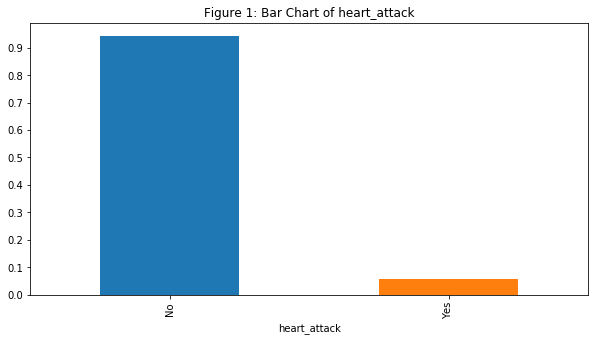

In [30]:
plt.figure(figsize = (10,5))
BarPlot('heart_attack')
plt.show();
i = i + 1

As we see from figure 1, those that have had a heart attack make up less than 10% of the total people questioned. This may prove to be a difficulty when creating our algortithm. Luckily, with a large number of instances we will be able to over represent those who have had a heart attack if necessary.

Next we will look at barcharts of the other categorical data. As the state variable has quite a few values, we will plot this individually.

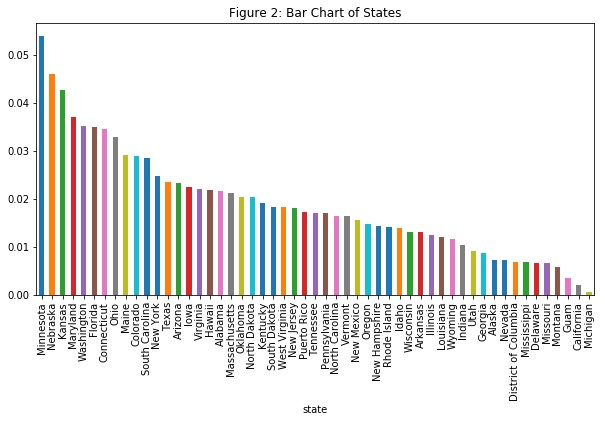

In [31]:
plt.figure(figsize = (10, 5))
ax = df['state'].value_counts(normalize = True).plot(kind = "bar")
ax.set_title('Figure '+ str(i) + ': Bar Chart of States')
ax.set_xlabel('state')
i = i + 1
plt.show();

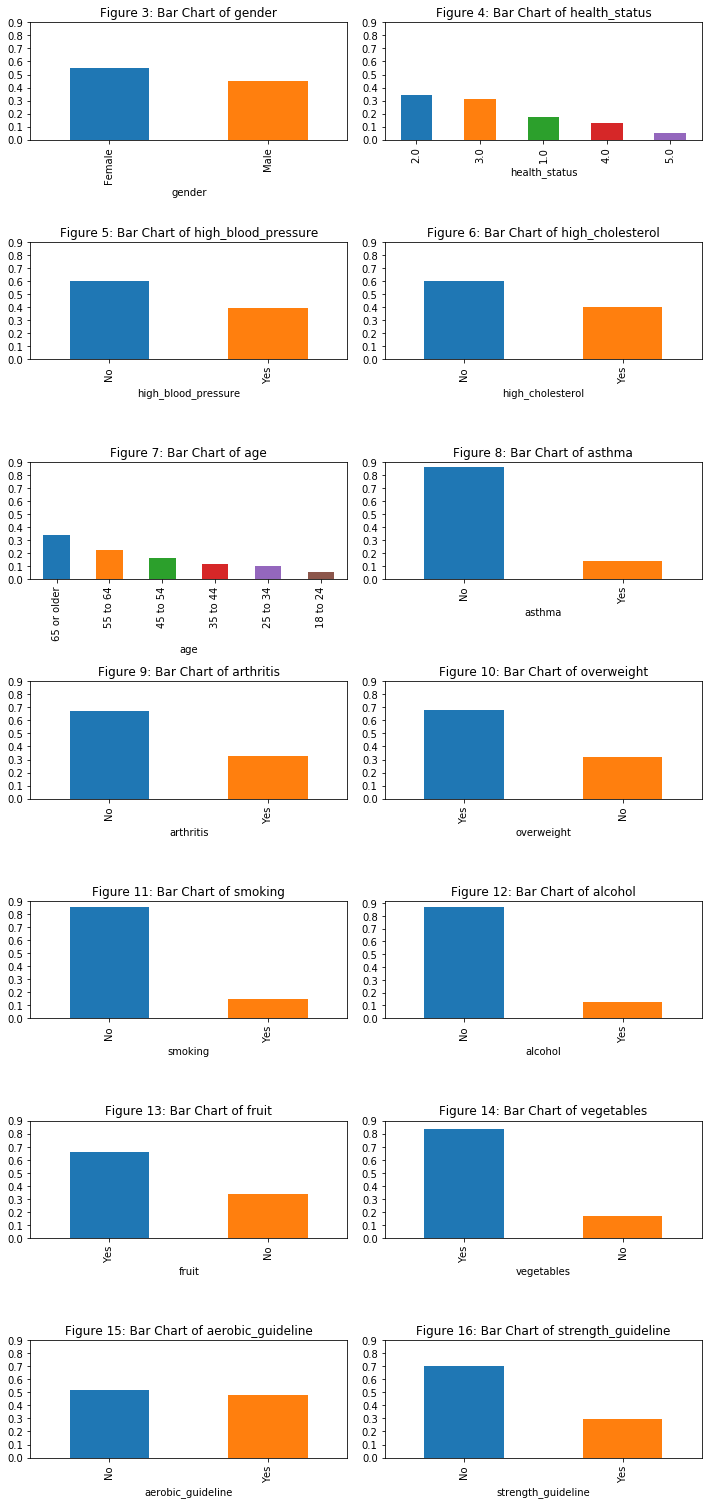

In [32]:
barplotlist = ['gender', 'health_status', 'high_blood_pressure', 'high_cholesterol', 'age', 'asthma',
              'arthritis', 'overweight', 'smoking', 'alcohol', 'fruit', 'vegetables', 'aerobic_guideline',
              'strength_guideline',]
n = len(barplotlist) + 1
half_n = n//2
j = 1
plt.figure(figsize = (10, 3*half_n))
for col in barplotlist:
    plt.subplot(half_n, 2, j)
    BarPlot(col)
    j = j + 1
    i = i +1
plt.tight_layout()
plt.show();

Looking through the charts, we see many things we would expect. The participants are fairly evenly distributed between male and female, a large percentage of the population reports eating fruits and vegetables, and a small percentage reports smoking. One interesting thing that stands out is the distribution of age. A much higher percentage of the sample is in an older demographic then is representative of the population.

Moving on to our continuous variables we will look at these with histograms, to see how they are distributed and whether it is fairly normal. Again, as we will be recycling the same graph for several variables we create a function for this plot.

In [33]:
import seaborn as sns
def HistogramPlot(x):
    plt.title("Figure " + str(i) + ": Histogram and Box Plot of " + x)
    sns.distplot(df[x])
    sns.despine()

C:\Users\thisisrickym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


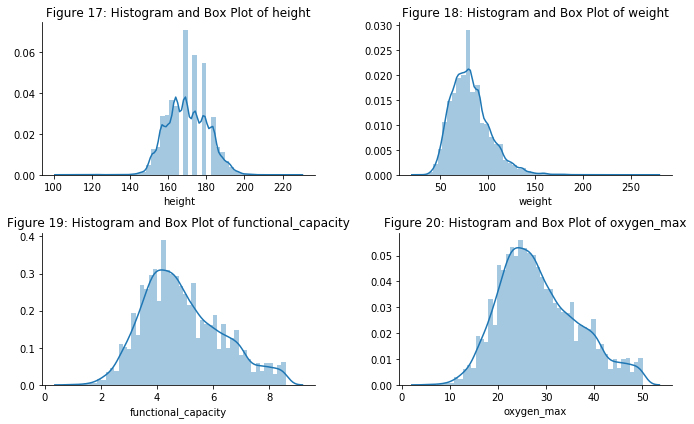

In [34]:
histlist = ['height', 'weight', 'functional_capacity', 'oxygen_max']
n = len(histlist) + 1
half_n = n//2
j = 1
plt.figure(figsize = (10, 3*half_n))
for col in histlist:
    plt.subplot(2, 2, j)
    HistogramPlot(col)
    j = j + 1
    i = i +1
plt.tight_layout()
plt.show();

From looking at their histograms, all of the continuous variables appear to not be close to normally distributed. We'll take a closer look at this by plotting their Q-Q Plots below.

In [35]:
from scipy import stats

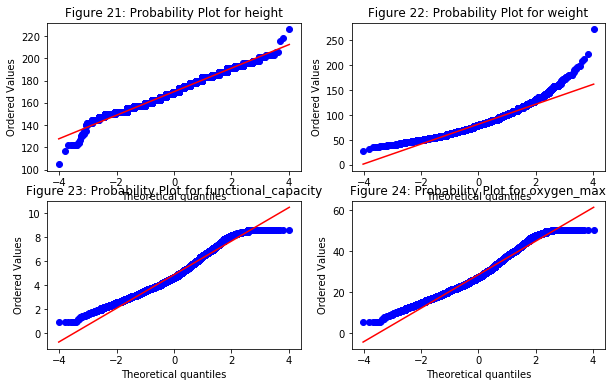

In [36]:
j=1
plt.figure(figsize = (10, 3*half_n))
for col in histlist:
    plt.subplot(2, 2, j)
    res = stats.probplot(df[col], plot = plt)
    plt.title('Figure ' + str(i) + ': Probability Plot for ' + col)
    j = j + 1
    i = i +1

Some of these flow a little bit off of the normal line. However, with such a large amount of instances we should be safe to assume normality despite these slight variations.

## Multivariate Visualization

Now we will look at how our variables interact with each other. We will first continue to explore our continuos variables, by looking for linear correlation between any of them.

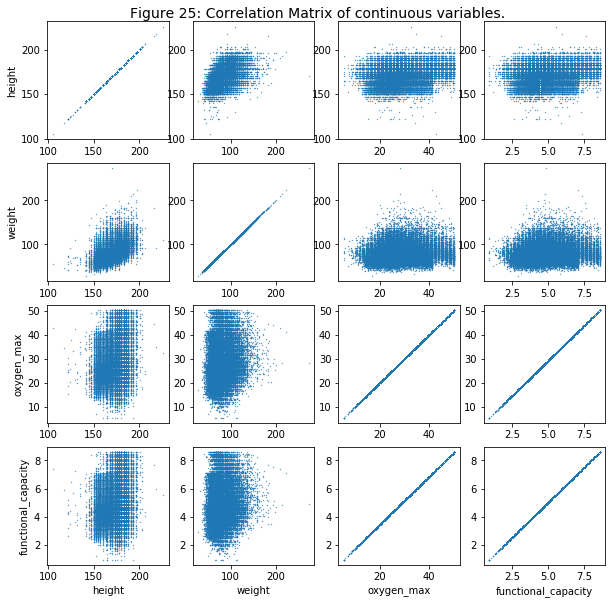

In [37]:
j = 1
plt.figure(figsize = (10,10))
plt.suptitle('Figure '+ str(i) + ': Correlation Matrix of continuous variables.', fontsize = 14, y = 0.9)
i = i +1
for col1 in ['height', 'weight', 'oxygen_max', 'functional_capacity']:
    for col2 in ['height', 'weight', 'oxygen_max', 'functional_capacity']:
        plt.subplot(4, 4, j)
        plt.scatter(df[col2], df[col1], s = .1)
        if j > 12:
            plt.xlabel(col2)
        if (j%4) == 1:
            plt.ylabel(col1)
        j = j+1

As we can see from these plots, functional_capacity and oxygen_max are very significantly correlated. This will have to be something we keep in mind as we move forward into creating our algorithms. The other variables do not seem to have a significant linear correlation, and should be fine to include with eachother in any algorithm.

Now we will take a look at how these continuous variables change with respect to our target variable. We create stacked histograms with each to visualize the differences.

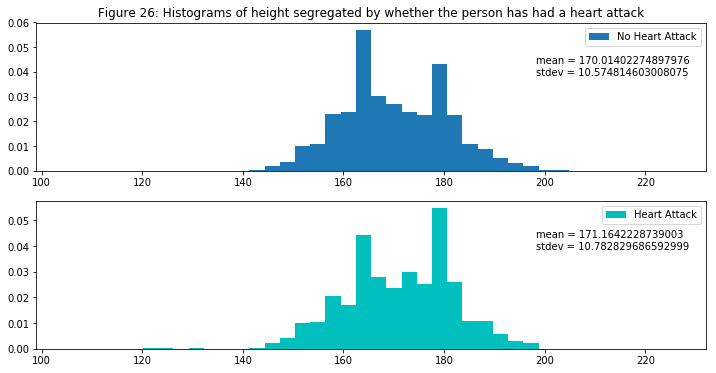

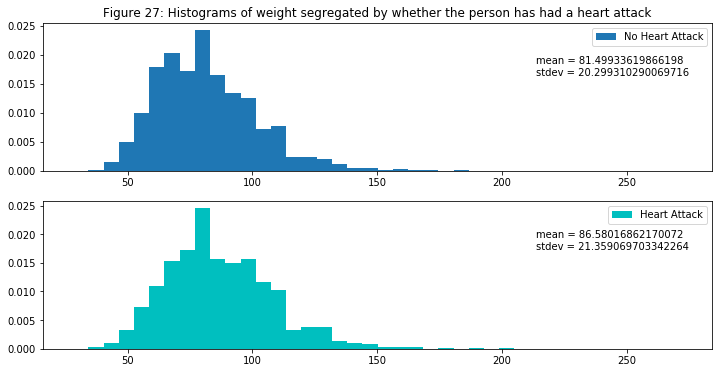

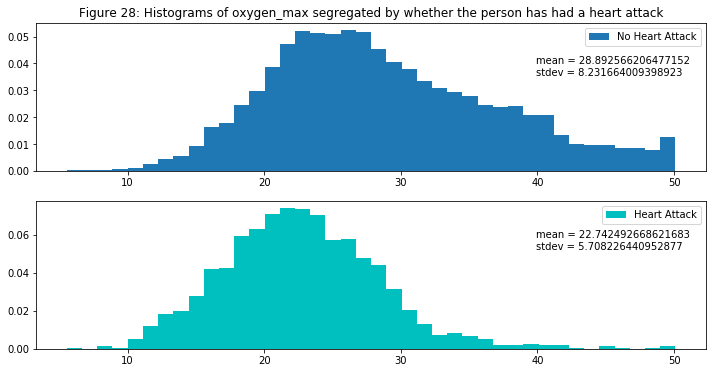

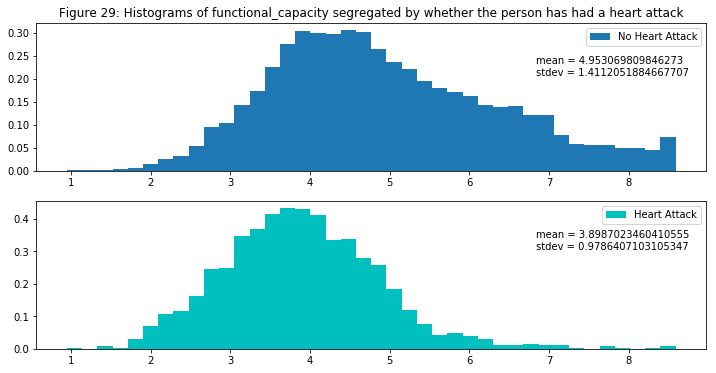

In [38]:
for col in ['height', 'weight', 'oxygen_max', 'functional_capacity']:
    plt.figure(figsize = (12,6))
    data1 = df.loc[df['heart_attack']=='No', col]
    data2 = df.loc[df['heart_attack']=='Yes', col]
    min_x = df[col].min()
    max_x = df[col].max()
    plt.subplot(2, 1, 1)
    plt.hist(data1, bins = 40, density = True, range = ([min_x, max_x]))
    plt.text(0.8, 0.93, ('mean = ' + str(data1.mean()) + '\nstdev = ' + str(data1.std())), transform=ax.transAxes)
    plt.legend(['No Heart Attack'])
    plt.title("Figure " + str(i) + ": Histograms of " + col + " segregated by whether the person has had a heart attack")
    i = i + 1
    plt.subplot(2, 1, 2)
    plt.hist(data2, bins = 40, density = True, range = ([min_x, max_x]), color = 'c')
    plt.text(0.8, 0.29, ('mean = ' + str(data2.mean()) + '\nstdev = ' + str(data2.std())), transform=ax.transAxes)
    plt.legend(['Heart Attack'])

    plt.show();

Based on these graphs it's tough to see the effect weight and height have on our target variable. This is backed up by the similarities in means and standard deviation. However it seems that as you get much above a 5 for functional capacity or 30 for oxygen_max, the percent of people reporting a heart attack drops significantly. This may prove useful for our algorithms.

We will now go back to our categorical binary variables and see the impact each has on our target variable. To show this I will plot the percentage of people reporting to have had a heart attack vs age group for both values of each binary variable.

As before, we create a function for these plots to reuse. However, we first independently create a graph for gender.

In [39]:
def LinePlot(y):
    counts = df_select.groupby(['age', y])['heart_attack'].value_counts(normalize = True).rename('Percent').mul(100).reset_index()
    data = counts.loc[counts['heart_attack'] == 1,['age', y, 'Percent']]
    age_order = ['18 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 or older']
    data1 = data.loc[data[y] == 0, ['age', 'Percent']]
    data2 = data.loc[data[y] == 1, ['age', 'Percent']]
    
    plt.plot(data1['age'], data1['Percent'], marker = ".", ms = 25, linewidth = 4)
    plt.plot(data2['age'], data2['Percent'], marker = ".", ms = 25, linewidth = 4)
    plt.ylabel('Percent With Previous Heart Attack')
    plt.xlabel('age')
    plt.xticks([1,2,3,4,5,6], age_order)
    plt.suptitle('Figure ' + str(i) + ': Line Graph of Percent having heart_attack with respect to age by ' + y)
    plt.legend([('Without ' + y), ('With ' + y)])

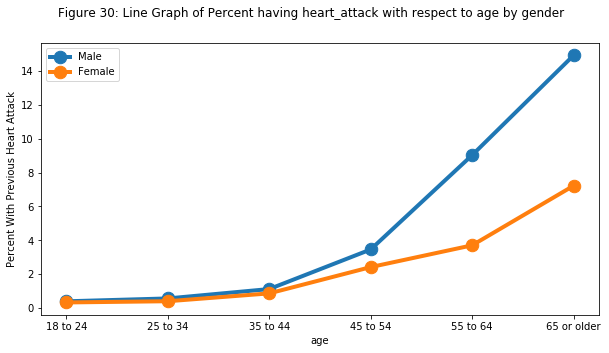

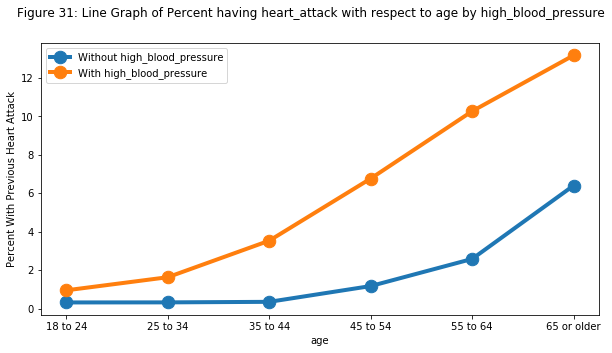

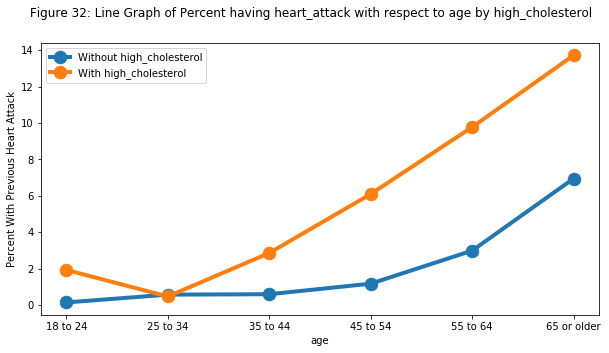

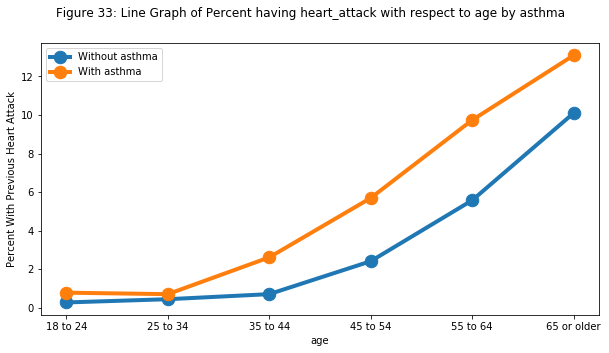

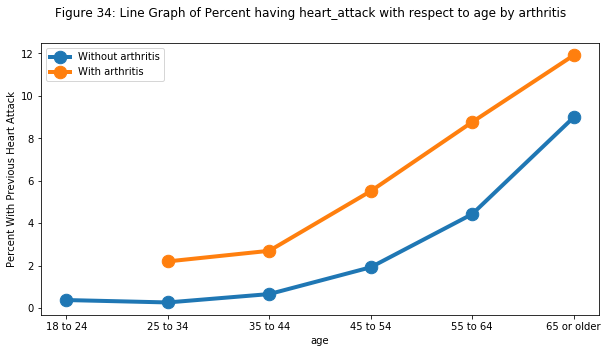

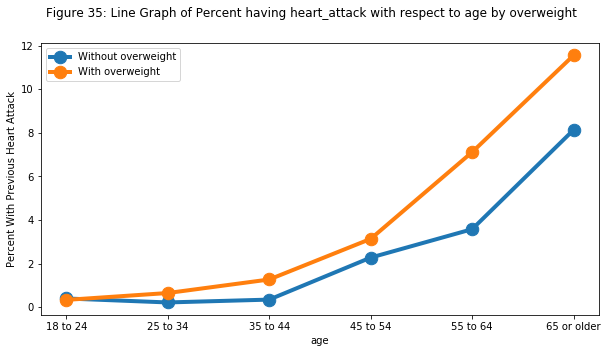

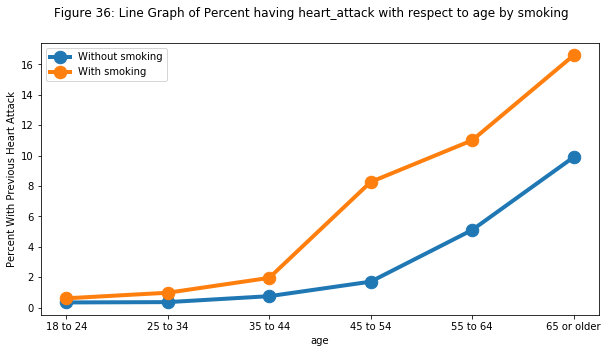

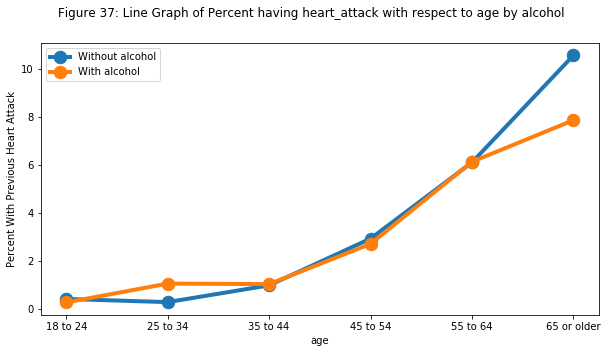

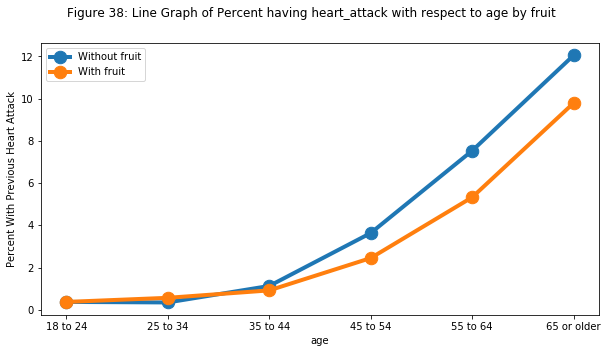

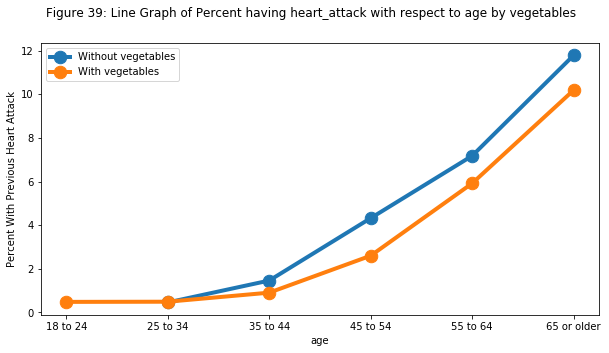

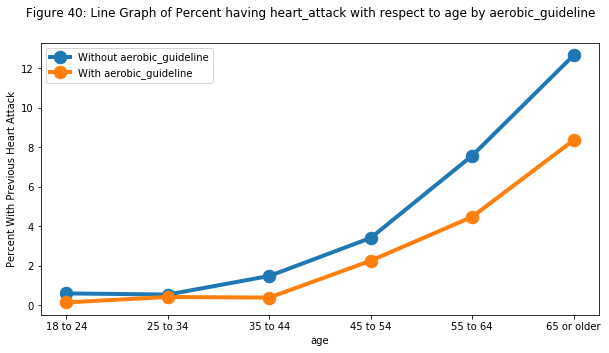

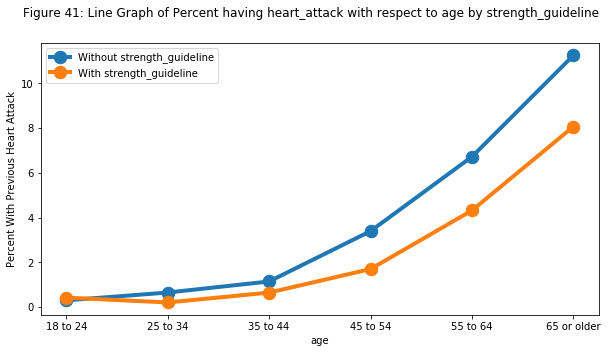

In [40]:
plt.figure(figsize=(10,5))
counts = df_select.groupby(['age', 'gender'])['heart_attack'].value_counts(normalize = True).rename('Percent').mul(100).reset_index()
data = counts.loc[counts['heart_attack'] == 1,['age', 'gender', 'Percent']]
age_order = ['18 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 or older']
data1 = data.loc[data['gender'] == 1, ['age', 'Percent']]
data2 = data.loc[data['gender'] == 2, ['age', 'Percent']]
    
plt.plot(data1['age'], data1['Percent'], marker = ".", ms = 25, linewidth = 4)
plt.plot(data2['age'], data2['Percent'], marker = ".", ms = 25, linewidth = 4)
plt.ylabel('Percent With Previous Heart Attack')
plt.xlabel('age')
plt.xticks([1,2,3,4,5,6], age_order)
plt.suptitle('Figure ' + str(i) + ': Line Graph of Percent having heart_attack with respect to age by gender')
i = i + 1
plt.legend(['Male', 'Female'])
plt.show();
    
lineplotlist = ['high_blood_pressure', 'high_cholesterol', 'asthma',
              'arthritis', 'overweight', 'smoking', 'alcohol', 'fruit', 'vegetables', 'aerobic_guideline',
              'strength_guideline',]
for col in lineplotlist:
    plt.figure(figsize=(10,5))
    LinePlot(col)
    plt.show();
    i = i+1

Looking over these charts, we can see many interesting things. Most obviously, and perhaps unsurprising, age has a huge impact on the percentage of people who have reported having a heart attack. It looks to grow exponentially in each chart. We see that most of our bivariate seem to have a significant effect on our target variable as well. Surprisingly, the variable with the least impact visualy is the use of alcohol.

# Summary

In Phase 1 we manually selected the calculated variables from the Behavioral Risk Factor Surveillance System data. We removed any of these variables with more than 15% missing values. We dropped variables with overlapping information, as well as those with irrelevent information towards our target variable. During our visualization and exploration we found many potentially useful variables in predicting our target variable. These include age, almost all of our binomial data, and functional_capacity.